### 3.Pandas - kluczowy pakiet do danych tabelarycznych

Pandas to popularna biblioteka programistyczna w języku Python, która jest używana do manipulacji i analizy danych. Jest to potężne narzędzie, które ułatwia wczytywanie, przekształcanie, eksplorację i analizę danych w formie tabelarycznej, takich jak arkusze kalkulacyjne lub bazy danych.

##### Główne cechy i funkcje biblioteki Pandas:

1. Struktury danych: Pandas wprowadza dwie główne struktury danych: Series i DataFrame.

- Series: To jednowymiarowa tablica danych, podobna do kolumny w arkuszu kalkulacyjnym lub kolumny w bazie danych. Series można traktować jako uporządkowany zestaw danych z indeksem.

- DataFrame: To dwuwymiarowa struktura danych, która przypomina tabelę lub arkusz kalkulacyjny. DataFrame składa się z kolumn i wierszy, a każda kolumna może zawierać różne typy danych.

2. Wczytywanie i zapisywanie danych: Pandas umożliwia wczytywanie danych z różnych źródeł, takich jak pliki CSV, Excel, SQL, JSON i wiele innych. Możesz również zapisywać dane do tych formatów.

3. Indeksowanie i selekcja danych: Pandas oferuje różnorodne mechanizmy indeksowania i selekcji danych, co pozwala na dostęp do konkretnych kolumn, wierszy lub komórek danych w bardzo elastyczny sposób.

4. Operacje na danych: Biblioteka umożliwia wykonywanie różnych operacji na danych, takich jak filtrowanie, sortowanie, grupowanie, łączenie i wiele innych. Możesz także przeprowadzać operacje matematyczne na danych w sposób efektywny.

5. Obsługa brakujących danych: Pandas oferuje narzędzia do radzenia sobie z danymi brakującymi, takie jak usuwanie lub uzupełnianie brakujących wartości.

6. Analiza i eksploracja danych: Biblioteka ułatwia eksplorację danych poprzez obliczanie statystyk opisowych, generowanie wykresów i wizualizacji danych.

7. Obsługa szeregów czasowych: Pandas posiada wsparcie dla operacji na szeregach czasowych, co jest przydatne w analizie danych związanych z czasem.

8. Integracja z innymi narzędziami: Pandas można łatwo łączyć z innymi bibliotekami do analizy danych i uczenia maszynowego, takimi jak NumPy, SciPy, Matplotlib, scikit-learn i wiele innych.

9. Wsparcie społeczności: Pandas posiada aktywną społeczność użytkowników i deweloperów, co oznacza, że istnieje wiele dostępnych źródeł, tutoriali i materiałów do nauki.



##### Strona internetowa
- https://pandas.pydata.org/

##### Dokumentacja
- https://pandas.pydata.org/pandas-docs/stable/

##### Polecana strona
- https://www.dataschool.io/easier-data-analysis-with-pandas/

In [2]:
!pip install pandas

In [3]:
# pip install pandas

import pandas as pd
pd.__version__

'2.3.3'

### `pd.Series()` - Tablica jednowymiarowa zawierająca dane oraz ich indeksy
Series jest jednowymiarową tablicą z etykietowanym indeksem, która może przechowywać dowolny typ danych – liczby, tekst, wartości logiczne, daty itp. Jest to fundament, na którym buduje się bardziej złożone struktury danych w Pandas.

In [4]:
s = pd.Series(data=[1, 2, 3])
s

0    1
1    2
2    3
dtype: int64

In [5]:
s = pd.Series(data=[1, 2, 3], index=['a', 'b', 'c'], name='test')
s

a    1
b    2
c    3
Name: test, dtype: int64

In [6]:
import numpy as np

s = pd.Series(data=[1, np.nan, 3], index=['a', 'b', 'c'], name='test')
s

a    1.0
b    NaN
c    3.0
Name: test, dtype: float64

In [7]:
s = pd.Series(data=[True, False, True])
s

0     True
1    False
2     True
dtype: bool

In [9]:
s = pd.Series(data=np.arange(1, 11), index=pd.date_range(start='20251216', periods=10))
s

2025-12-16     1
2025-12-17     2
2025-12-18     3
2025-12-19     4
2025-12-20     5
2025-12-21     6
2025-12-22     7
2025-12-23     8
2025-12-24     9
2025-12-25    10
Freq: D, dtype: int64

In [10]:
s.dtypes

dtype('int64')

Atrybut z indeksami jest obiektem typu `pd.Index`:

In [11]:
s.index # często będziemy się posługiwać tą metodą

DatetimeIndex(['2025-12-16', '2025-12-17', '2025-12-18', '2025-12-19',
               '2025-12-20', '2025-12-21', '2025-12-22', '2025-12-23',
               '2025-12-24', '2025-12-25'],
              dtype='datetime64[ns]', freq='D')

Atrybut `.values` jest tablicą NumPy

In [12]:
s.values # często będziemy się posługiwać tą metodą

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10])

## Series vs tablica NumPy

Series uogólnia jednowymiarową tablicę NumPy:
* tablica NumPy posiada wewnętrzną indeksację w stylu Pythona (*implicit index*);
* Series posiada wewnętrzną indeksację w stylu Pythona plus indeksację za pomocą etykiet.

In [15]:
a = np.array([1,2,3])
a[0]

np.int64(1)

In [16]:
s = pd.Series([3, 1, 2.71, -10], index=['a', 'b', 'c', 'd'])
s

a     3.00
b     1.00
c     2.71
d   -10.00
dtype: float64

In [17]:
s['c']

np.float64(2.71)

Indeks etykiet może:
* nie zachowywać kolejności,
* posiadać luki,
* posiadać powtórzenia.

In [18]:
s = pd.Series([3, 1, 2.71, -10, 50], index=[3, 2, 5, 2, 100])
s

3       3.00
2       1.00
5       2.71
2     -10.00
100    50.00
dtype: float64

In [19]:
s = pd.Series(data=['python', 'sas', 'r'], name='jezyki')
s

0    python
1       sas
2         r
Name: jezyki, dtype: object

## Series jako rodzaj słownika

Klucze słownika przechodzą na etykiety podczas przekształcania słownika na obiekt Series:

In [20]:
ludność_dict = {'Polska': 38501,
                'Czechy': 10221,
                'Szwecja': 9045,
                'Niemcy': 82370,
                'Litwa': 3565}

ludność = pd.Series(ludność_dict)
ludność

Polska     38501
Czechy     10221
Szwecja     9045
Niemcy     82370
Litwa       3565
dtype: int64

Indeks etykiet w obiekcie Series ma niektóre cechy kluczy słownika, np. dostęp do elementu:

In [21]:
ludność['Polska']

np.int64(38501)

Etykieta jako atrybut, tego słowniki nie potrafią:

In [22]:
ludność.Polska # jak pisać żeby używać tej notacji (z _)

np.int64(38501)

In [24]:
ludność

Polska     38501
Czechy     10221
Szwecja     9045
Niemcy     82370
Litwa       3565
dtype: int64

## Selekcja elementów z obiektu Series

Obiekt Series ma równocześnie cechy słownika i jednowymiarowej tablicy. 

Niektóre wzorce dostępu do elementów naśladują te ze słownika, inne te z tablicy jednowymiarowej.

Series jako słownik:

In [25]:
ludność['Czechy']

np.int64(10221)

In [26]:
'Polska' in ludność

True

In [27]:
ludność.keys()

Index(['Polska', 'Czechy', 'Szwecja', 'Niemcy', 'Litwa'], dtype='object')

In [28]:
list(ludność.items())

[('Polska', 38501),
 ('Czechy', 10221),
 ('Szwecja', 9045),
 ('Niemcy', 82370),
 ('Litwa', 3565)]

Modyfikacja w miejscu:

In [29]:
ludność['Grecja'] = 10723
ludność

Polska     38501
Czechy     10221
Szwecja     9045
Niemcy     82370
Litwa       3565
Grecja     10723
dtype: int64

Series jako tablica jednowymiarowa pozwala na dostęp do wartości poprzez:
* wycinki,
* maskowanie,
* wymyślne indeksowanie.

In [31]:
ludność

Polska     38501
Czechy     10221
Szwecja     9045
Niemcy     82370
Litwa       3565
Grecja     10723
dtype: int64

In [30]:
# Wycinek indeksów z poziomu etykiet
ludność['Czechy':'Niemcy'] # Prawy kraniec zaliczony!

Czechy     10221
Szwecja     9045
Niemcy     82370
dtype: int64

In [32]:
# Wycinek wewnętrznych indeksów Pythona
ludność[1:3] # Prawie kraniec wykluczony!

Czechy     10221
Szwecja     9045
dtype: int64

In [33]:
# Maskowanie
ludność[(10000 < ludność) & (ludność < 40000)]

Polska    38501
Czechy    10221
Grecja    10723
dtype: int64

In [34]:
# Indeksowanie wymyślne (fancy indexing), indeks etykiet
ludność[['Czechy', 'Grecja', 'Litwa']]

Czechy    10221
Grecja    10723
Litwa      3565
dtype: int64

In [35]:
# Indeksowanie wymyślne (fancy indexing), indeks wewnętrzny Pythona
ludność[[2, 4, 2]]

/var/folders/14/lsx5gcnn58q23ht_xjqydrnw0000gn/T/ipykernel_82081/176246164.py:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  ludność[[2, 4, 2]]


Szwecja    9045
Litwa      3565
Szwecja    9045
dtype: int64

In [36]:
ludność.iloc[[2, 4, 2]]

Szwecja    9045
Litwa      3565
Szwecja    9045
dtype: int64

## Zagadka

In [37]:
s = pd.Series(['a', 'b', 'c'], index=[1, 2, 3])
s

1    a
2    b
3    c
dtype: object

Jaka wartość kryje się pod `s[2]`? Co zwróci `s[1:3]`?

In [38]:
s[2] # 2 z poziomu etykiet.

'b'

In [39]:
s[1:3] # Ale wycinek po indeksach wewnętrznych.

2    b
3    c
dtype: object

## Indeksery `loc`, `iloc`

* Atrybut `loc` zawsze odnosi się do indeksów z poziomu etykiet.
* Atrybut `iloc` zawsze odnosi się do indeksów wewnętrznych Pythona, czyli do zwykłej numeracji całkowitoliczbowej od zera w górę.

In [40]:
s = pd.Series(['a', 'b', 'c'], index=[1, 2, 3])
s

1    a
2    b
3    c
dtype: object

In [48]:
s.iloc[2]

'c'

In [46]:
s.loc[3]

'c'

In [49]:
s.iloc[1], s.loc[1]

('b', 'a')

In [50]:
s.iloc[1:3] # Wyklucza prawy kraniec!

2    b
3    c
dtype: object

In [51]:
s.loc[1:3] # Włącza prawy kraniec!

1    a
2    b
3    c
dtype: object

In [ ]:
#Statystyki

In [52]:
ceny_akcji = pd.Series(data={'Orlen': 70, 'PZU': 30, 'KGHM': 100})
ceny_akcji

Orlen     70
PZU       30
KGHM     100
dtype: int64

In [56]:
ceny_akcji.loc['Orlen']

np.int64(70)

In [55]:
ceny_akcji.iloc[0]

np.int64(70)

In [57]:
ceny_akcji.iloc[0]

np.int64(70)

In [58]:
ceny_akcji.count()

np.int64(3)

In [59]:
ceny_akcji.value_counts(dropna=False)

70     1
30     1
100    1
Name: count, dtype: int64

In [60]:
ceny_akcji.sum()

np.int64(200)

In [61]:
ceny_akcji.min()

np.int64(30)

In [62]:
ceny_akcji.max()

np.int64(100)

In [63]:
ceny_akcji.std()

np.float64(35.11884584284247)

In [64]:
ceny_akcji.describe()

count      3.000000
mean      66.666667
std       35.118846
min       30.000000
25%       50.000000
50%       70.000000
75%       85.000000
max      100.000000
dtype: float64

In [65]:
ceny_akcji.nlargest(2)

KGHM     100
Orlen     70
dtype: int64

In [66]:
ceny_akcji.nsmallest(2)

PZU      30
Orlen    70
dtype: int64

In [67]:
ceny_akcji.rank()

Orlen    2.0
PZU      1.0
KGHM     3.0
dtype: float64

In [69]:
ceny_akcji.sort_values(ascending=True)

PZU       30
Orlen     70
KGHM     100
dtype: int64

## `pd.Series()`

Funkcja `pd.Series()` pozwala na tworzenie obiektów Series wg. schematu
```python
pd.Series(dane, index=index)
```
Parametr `index` jest opcjonalny, parametr `dane` może przyjmować rozmaitą postać.

### `pd.DataFrame()` - Dwuwymiarowa tabela, w której kolumnami są obiekty Series.
pd.DataFrame() jest jedną z najbardziej wszechstronnych i podstawowych struktur danych oferowanych przez bibliotekę Pandas. DataFrame to dwuwymiarowa tablica danych, która może przechowywać dane o różnych typach (liczby, tekst, wartości logiczne, daty itp.) w kolumnach. Struktura ta jest podobna do arkusza kalkulacyjnego lub tabeli relacyjnej bazy danych, co czyni ją niezwykle użyteczną do analizy danych.

**W analizie danych DataFrame jest często przedstawiana jako tabela, w której kolumny to zmienne a wiersze to obserwacje.**

In [70]:
ludność_dict = {'Polska': 38501,
                'Czechy': 10221,
                'Szwecja': 9045,
                'Niemcy': 82370,
                'Litwa': 3565}

ludność = pd.Series(ludność_dict)
ludność

Polska     38501
Czechy     10221
Szwecja     9045
Niemcy     82370
Litwa       3565
dtype: int64

In [71]:
powierzchnia_dict = {'Polska': 322.6,
                     'Czechy': 78.9,
                     'Szwecja': 450,
                     'Niemcy': 357,
                     'Litwa': 65.3}

powierzchnia = pd.Series(powierzchnia_dict)
powierzchnia

Polska     322.6
Czechy      78.9
Szwecja    450.0
Niemcy     357.0
Litwa       65.3
dtype: float64

In [72]:
kraje = pd.DataFrame({'powierzchnia': powierzchnia,
                      'ludność': ludność})
kraje

,powierzchnia,ludność
Polska,322.6,38501
Czechy,78.9,10221
Szwecja,450.0,9045
Niemcy,357.0,82370
Litwa,65.3,3565


## DataFrame uogólnia tablicę 2D NumPy

Podobnie jak Series obiekty DataFrame posiadają dwa poziomy indeksów dla wierszy: 
* wewnętrzny z numeracją liczbami całkowitymi od zera,
* zbudowany z etykiet.

In [73]:
kraje.index

Index(['Polska', 'Czechy', 'Szwecja', 'Niemcy', 'Litwa'], dtype='object')

Dodatkowo DataFrame posiada indeks z etykietami kolumn. Jest to również obiekt klasy `pd.Index`:

In [74]:
kraje.columns

Index(['powierzchnia', 'ludność'], dtype='object')

## DataFrame jako rodzaj słownika

Odpowiednikami kluczy słownika w obiekcie DataFrame są etykiety kolumn:

In [75]:
kraje['powierzchnia']

Polska     322.6
Czechy      78.9
Szwecja    450.0
Niemcy     357.0
Litwa       65.3
Name: powierzchnia, dtype: float64

In [82]:
kraje

,powierzchnia,ludność
Polska,322.6,38501
Czechy,78.9,10221
Szwecja,450.0,9045
Niemcy,357.0,82370
Litwa,65.3,3565


In [81]:
kraje.iloc[0]

powierzchnia      322.6
ludność         38501.0
Name: Polska, dtype: float64

In [78]:
kraje.loc['Polska']

powierzchnia      322.6
ludność         38501.0
Name: Polska, dtype: float64

## Sposoby konstrukcji obiektów DataFrame

Z obiektu Series:

In [83]:
pd.DataFrame(ludność, columns=['ludność'])

,ludność
Polska,38501
Czechy,10221
Szwecja,9045
Niemcy,82370
Litwa,3565


Z listy słowników:

In [84]:
list_dict = [{'a': 1, 'b': 2, 'c': 100},
             {'b': 10, 'c': 'Ala'},
             {'a': 0, 'b': 0, 'c': 1, 'd': 2}]
pd.DataFrame(list_dict)

,a,b,c,d
0,1.0,2,100,NaN
1,NaN,10,Ala,NaN
2,0.0,0,1,2.0


Ze słownika obiektów Series:

In [85]:
pd.DataFrame({'ludność': ludność,
              'powierzchnia': powierzchnia})

,ludność,powierzchnia
Polska,38501,322.6
Czechy,10221,78.9
Szwecja,9045,450.0
Niemcy,82370,357.0
Litwa,3565,65.3


Z dwuwymiarowej tablicy NumPy:

In [86]:
import numpy as np
arr = np.arange(10).reshape(5, 2)
arr

array([[0, 1],
       [2, 3],
       [4, 5],
       [6, 7],
       [8, 9]])

In [87]:
pd.DataFrame(arr, index=['a', 'b', 'c', 'd', 'e'],
             columns=['X', 'Y'])

,X,Y
a,0,1
b,2,3
c,4,5
d,6,7
e,8,9


## Index

Cechy obiektu typu Index:
* niezmienny (*immutable*),
* uporządkowany,
* może zawierać powtórzenia.

Index jako niezmienna tablica:

In [88]:
ind = pd.Index([2, 4, 6, 4, 4, 10, 25])
ind

Index([2, 4, 6, 4, 4, 10, 25], dtype='int64')

In [89]:
ind[0], ind[-1]

(np.int64(2), np.int64(25))

In [90]:
ind[::2]

Index([2, 6, 4, 25], dtype='int64')

In [91]:
ind.ndim, ind.shape, ind.size, ind.dtype

(1, (7,), 7, dtype('int64'))

In [94]:
kraje

,powierzchnia,ludność
Polska,322.6,38501
Czechy,78.9,10221
Szwecja,450.0,9045
Niemcy,357.0,82370
Litwa,65.3,3565


In [98]:
# Reset do indeksu domyślnego 0,1...n
kraje.reset_index(inplace=True)

In [99]:
kraje

,index,powierzchnia,ludność
0,Polska,322.6,38501
1,Czechy,78.9,10221
2,Szwecja,450.0,9045
3,Niemcy,357.0,82370
4,Litwa,65.3,3565


In [100]:
# Ustawienie nowego indeksu
kraje.set_index('index', inplace=True)

In [101]:
kraje

,powierzchnia,ludność
index,,
Polska,322.6,38501
Czechy,78.9,10221
Szwecja,450.0,9045
Niemcy,357.0,82370
Litwa,65.3,3565


## Selekcja danych z ramki DataFrame

Ramka DataFrame ma równocześnie cechy słownika i dwuwymiarowej tablicy. 

Podobnie jak dla obiektów Series niektóre wzorce dostępu do elementów naśladują te ze słownika, inne te z tablicy dwywymiarowej.

Przypomnijmy ramkę `kraje`:

In [102]:
kraje

,powierzchnia,ludność
index,,
Polska,322.6,38501
Czechy,78.9,10221
Szwecja,450.0,9045
Niemcy,357.0,82370
Litwa,65.3,3565


DataFrame jako słownik obiektów Series:

In [103]:
kraje['powierzchnia']

index
Polska     322.6
Czechy      78.9
Szwecja    450.0
Niemcy     357.0
Litwa       65.3
Name: powierzchnia, dtype: float64

In [104]:
kraje.powierzchnia

index
Polska     322.6
Czechy      78.9
Szwecja    450.0
Niemcy     357.0
Litwa       65.3
Name: powierzchnia, dtype: float64

Dostęp do kolumny poprzez nazwę atrybutu jest możliwy, gdy:
* nazwa kolumny jest poprawną nazwą zmiennej w języku Python,
* nazwa kolumny nie jest przesłonięta przez nazwę już istniejącego atrybutu.

Modyfikacja w miejscu:

In [105]:
kraje['gęstość zaludnienia'] = kraje.ludność / kraje.powierzchnia
kraje

,powierzchnia,ludność,gęstość zaludnienia
index,,,
Polska,322.6,38501,119.345939
Czechy,78.9,10221,129.543726
Szwecja,450.0,9045,20.100000
Niemcy,357.0,82370,230.728291
Litwa,65.3,3565,54.594181


DataFrame jako tablica 2D:

In [106]:
kraje.values

array([[3.22600000e+02, 3.85010000e+04, 1.19345939e+02],
       [7.89000000e+01, 1.02210000e+04, 1.29543726e+02],
       [4.50000000e+02, 9.04500000e+03, 2.01000000e+01],
       [3.57000000e+02, 8.23700000e+04, 2.30728291e+02],
       [6.53000000e+01, 3.56500000e+03, 5.45941807e+01]])

In [107]:
kraje.iloc[:3, :2] # Pierwsze trzy rzędy, pierwsze dwie kolumny.

,powierzchnia,ludność
index,,
Polska,322.6,38501
Czechy,78.9,10221
Szwecja,450.0,9045


In [108]:
kraje.iloc[3] # Czwarty rząd.

powierzchnia             357.000000
ludność                82370.000000
gęstość zaludnienia      230.728291
Name: Niemcy, dtype: float64

In [109]:
# Wycinki wzgledem indeksów z poziomu etykiet.
kraje.loc['Szwecja':'Litwa', 'ludność':] 

,ludność,gęstość zaludnienia
index,,
Szwecja,9045,20.100000
Niemcy,82370,230.728291
Litwa,3565,54.594181


In [110]:
# Maskowanie
kraje[(kraje.powierzchnia > 100) & (kraje['gęstość zaludnienia'] < 200)]

,powierzchnia,ludność,gęstość zaludnienia
index,,,
Polska,322.6,38501,119.345939
Szwecja,450.0,9045,20.100000


In [111]:
# Wymyślne indeksowanie dla kolumn.
kraje[['powierzchnia', 'gęstość zaludnienia']]

,powierzchnia,gęstość zaludnienia
index,,
Polska,322.6,119.345939
Czechy,78.9,129.543726
Szwecja,450.0,20.100000
Niemcy,357.0,230.728291
Litwa,65.3,54.594181


In [112]:
# Wymyślne indeksowanie dla indeksów z poziomu etykiet.
kraje.loc[['Litwa', 'Polska'], ['ludność']]

,ludność
index,
Litwa,3565
Polska,38501


In [113]:
# Kombinacja maskowania i wymyślnej indeksacji
kraje.loc[kraje.powierzchnia > 300, ['ludność']]

,ludność
index,
Polska,38501
Szwecja,9045
Niemcy,82370


Stosowanie instrukcji przypisania do podanych wyżej selekcji prowadzi do modyfikacji ramki w miejscu:

In [114]:
df = pd.DataFrame([[1, 2], [3, 4], [10, 20]],
                  columns=['a', 'b'],
                  index=['x', 'y', 'z'])
df

,a,b
x,1,2
y,3,4
z,10,20


### Operacje na `pd.DataFrame`

In [116]:
df = pd.DataFrame({'col one':[100, 200], 'col two':[300, 400]})
df

,col one,col two
0,100,300
1,200,400


In [117]:
df = df.rename({'col one':'col_one', 'col two':'col_two'}, axis='columns')
df

,col_one,col_two
0,100,300
1,200,400


In [118]:
df.columns = ['col_one', 'col_two'] # prostsza metoda
df

,col_one,col_two
0,100,300
1,200,400


In [120]:
df.columns

Index(['col_one', 'col_two'], dtype='object')

In [121]:
df.index

RangeIndex(start=0, stop=2, step=1)

In [122]:
df.values

array([[100, 300],
       [200, 400]])

In [123]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype
---  ------   --------------  -----
 0   col_one  2 non-null      int64
 1   col_two  2 non-null      int64
dtypes: int64(2)
memory usage: 164.0 bytes


In [124]:
df.describe()

,col_one,col_two
count,2.000000,2.000000
mean,150.000000,350.000000
std,70.710678,70.710678
min,100.000000,300.000000
25%,125.000000,325.000000
50%,150.000000,350.000000
75%,175.000000,375.000000
max,200.000000,400.000000


#### Dodadnie kolumny

In [125]:
df

,col_one,col_two
0,100,300
1,200,400


In [126]:
df['col_three'] = df['col_two'] * 2
df

,col_one,col_two,col_three
0,100,300,600
1,200,400,800


In [127]:
df.sum()

col_one       300
col_two       700
col_three    1400
dtype: int64

Aby wykonać operację uniwarsalną na ramce i obiekcie Series względem kolumn należy użyć metod z parametrem `axis`:

In [128]:
df.sum(axis=1)

0    1000
1    1400
dtype: int64

***Usuwanie kolumny***

In [129]:
df

,col_one,col_two,col_three
0,100,300,600
1,200,400,800


In [136]:
df.drop(0, axis=0)

,col_one,col_two,col_three
1,200,400,800


In [133]:
df.drop('col_three',axis=1)

,col_one,col_two
0,100,300
1,200,400


In [138]:
# Usunięcie kolumny nie jest permanentne dopóki tego nie zadeklarujemy jawnie
# Kolumna cały czas jest!
df

,col_one,col_two,col_three
0,100,300,600
1,200,400,800


In [139]:
df.drop('col_three', axis=1, inplace=True)
# df = df.drop('new', axis=1)
# df = df.drop(columns=['new'])

In [140]:
# Dopiero teraz jej nie ma
df

,col_one,col_two
0,100,300
1,200,400


***Usunięcie wiersza***

In [141]:
df.drop(1)

,col_one,col_two
0,100,300


In [142]:
df

,col_one,col_two
0,100,300
1,200,400


### Braki danych

In [143]:
df = pd.DataFrame({'A':[1,2,np.nan],
                  'B':[5,np.nan,np.nan],
                  'C':[1,2,3]})

In [144]:
df

,A,B,C
0,1.0,5.0,1
1,2.0,NaN,2
2,NaN,NaN,3


In [146]:
df.isna().sum()

A    1
B    2
C    0
dtype: int64

In [147]:
df.dropna()

,A,B,C
0,1.0,5.0,1


In [148]:
df.dropna(axis=1)

,C
0,1
1,2
2,3


In [149]:
df.dropna(thresh=2)

,A,B,C
0,1.0,5.0,1
1,2.0,NaN,2


In [152]:
df

,A,B,C
0,1.0,5.0,1
1,2.0,NaN,2
2,NaN,NaN,3


In [153]:
df.fillna(value='BRAK')

,A,B,C
0,1.0,5.0,1
1,2.0,BRAK,2
2,BRAK,BRAK,3


In [156]:
df.fillna(value=0)

,A,B,C
0,1.0,5.0,1
1,2.0,0.0,2
2,0.0,0.0,3


In [159]:
df['A'].fillna(value=df['A'].mean())

/var/folders/14/lsx5gcnn58q23ht_xjqydrnw0000gn/T/ipykernel_82081/4106936588.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['A'].fillna(value=df['A'].mean(), inplace=True)


In [162]:
df.dropna()

,A,B,C
0,1.0,5.0,1


In [163]:
df

,A,B,C
0,1.0,5.0,1
1,2.0,NaN,2
2,1.5,NaN,3


In [160]:
df

,A,B,C
0,1.0,5.0,1
1,2.0,NaN,2
2,1.5,NaN,3


### Grupowanie (group by)

In [165]:
# Tworzymy ramkę danych
data = {'Company':['GOOG','GOOG','MSFT','MSFT','FB','FB'],
       'Person':['Sam','Charlie','Amy','Vanessa','Carl','Sarah'],
       'Sales':[200,120,340,124,243,350]}

In [167]:
df = pd.DataFrame(data)
df

,Company,Person,Sales
0,GOOG,Sam,200
1,GOOG,Charlie,120
2,MSFT,Amy,340
3,MSFT,Vanessa,124
4,FB,Carl,243
5,FB,Sarah,350


In [168]:
df.dtypes

Company    object
Person     object
Sales       int64
dtype: object

In [170]:
#df.groupby('Company').mean() # w pandasie 1.x działało

In [172]:
df

,Company,Person,Sales
0,GOOG,Sam,200
1,GOOG,Charlie,120
2,MSFT,Amy,340
3,MSFT,Vanessa,124
4,FB,Carl,243
5,FB,Sarah,350


In [178]:
df[['Company', 'Sales']].groupby('Company').median()

,Sales
Company,
FB,296.5
GOOG,160.0
MSFT,232.0


In [174]:
#od pandas 2.0
df.groupby('Company').mean(numeric_only=True)

,Sales
Company,
FB,296.5
GOOG,160.0
MSFT,232.0


In [179]:
# Przypisujemy grupę do zmiennej
by_comp = df.groupby("Company")
by_comp

In [180]:
# Wykonujemy agregację na grupie
by_comp.mean(numeric_only=True)

,Sales
Company,
FB,296.5
GOOG,160.0
MSFT,232.0


In [181]:
# Inne metody agregacji na grupie
by_comp.std(numeric_only=True)

,Sales
Company,
FB,75.660426
GOOG,56.568542
MSFT,152.735065


In [182]:
by_comp.min(numeric_only=True)

,Sales
Company,
FB,243
GOOG,120
MSFT,124


In [183]:
by_comp.max(numeric_only=True)

,Sales
Company,
FB,350
GOOG,200
MSFT,340


In [184]:
by_comp.count()

,Person,Sales
Company,,
FB,2,2
GOOG,2,2
MSFT,2,2


In [187]:
type(by_comp.describe())

pandas.core.frame.DataFrame

In [189]:
by_comp.describe()

Sales                                                        
        count   mean         std    min     25%    50%     75%    max
Company                                                              
FB        2.0  296.5   75.660426  243.0  269.75  296.5  323.25  350.0
GOOG      2.0  160.0   56.568542  120.0  140.00  160.0  180.00  200.0
MSFT      2.0  232.0  152.735065  124.0  178.00  232.0  286.00  340.0

In [191]:
by_comp.describe().transpose()

Company              FB        GOOG        MSFT
Sales count    2.000000    2.000000    2.000000
      mean   296.500000  160.000000  232.000000
      std     75.660426   56.568542  152.735065
      min    243.000000  120.000000  124.000000
      25%    269.750000  140.000000  178.000000
      50%    296.500000  160.000000  232.000000
      75%    323.250000  180.000000  286.000000
      max    350.000000  200.000000  340.000000

In [188]:
by_comp.describe().transpose()['GOOG'].iloc[1]

np.float64(160.0)

### Daty - pd.Timestamp()
https://docs.python.org/3/library/datetime.html

In [192]:
data_test = '2025-12-17'
data_test

'2025-12-17'

In [197]:
pd.to_datetime(data_test)

Timestamp('2025-12-17 00:00:00')

In [202]:
data = pd.Timestamp.today()
data

Timestamp('2025-12-17 10:56:16.168799')

In [203]:
'2024-06-11'

'2024-06-11'

In [204]:
pd.Timestamp('2024-06-11')

Timestamp('2024-06-11 00:00:00')

In [205]:
data.strftime(format='%d%m%Y')

'17122025'

In [206]:
type(data)

pandas._libs.tslibs.timestamps.Timestamp

In [207]:
data.year

2025

In [208]:
data.day

17

In [209]:
data_dzis = data.strftime(format='%Y%m%d')

In [210]:
df.groupby('Company').describe()

Sales                                                        
        count   mean         std    min     25%    50%     75%    max
Company                                                              
FB        2.0  296.5   75.660426  243.0  269.75  296.5  323.25  350.0
GOOG      2.0  160.0   56.568542  120.0  140.00  160.0  180.00  200.0
MSFT      2.0  232.0  152.735065  124.0  178.00  232.0  286.00  340.0

In [212]:
# zapis do Excela dowolnych statystyk z dzisiejszą datą 

df.groupby('Company').describe().to_excel(f'statystyki_{data_dzis}.xlsx')

In [ ]:
'2025/06/05'

In [248]:
d = pd.to_datetime('2025/17/12', format='%Y/%d/%m')
d

Timestamp('2025-12-17 00:00:00')

In [258]:
d.strftime('%Y-%m-%d')

'2025-12-17'

In [256]:
f'{d.year}-{d.month}-{d.day}'

'2025-12-17'

In [259]:
d.date()

datetime.date(2025, 12, 17)

In [266]:
pd.Timestamp.today()

Timestamp('2025-12-17 11:15:37.922147')

## Łączenie danych
- https://pandas.pydata.org/docs/user_guide/merging.html

In [267]:
df1 = pd.DataFrame({'A': ['A0', 'A1', 'A2', 'A3'],
                        'B': ['B0', 'B1', 'B2', 'B3'],
                        'C': ['C0', 'C1', 'C2', 'C3'],
                        'D': ['D0', 'D1', 'D2', 'D3']},
                        index=[0, 1, 2, 3])

df2 = pd.DataFrame({'A': ['A4', 'A5', 'A6', 'A7'],
                        'B': ['B4', 'B5', 'B6', 'B7'],
                        'C': ['C4', 'C5', 'C6', 'C7'],
                        'D': ['D4', 'D5', 'D6', 'D7']},
                         index=[4, 5, 6, 7]) 

df3 = pd.DataFrame({'A': ['A8', 'A9', 'A10', 'A11'],
                        'B': ['B8', 'B9', 'B10', 'B11'],
                        'C': ['C8', 'C9', 'C10', 'C11'],
                        'D': ['D8', 'D9', 'D10', 'D11']},
                        index=[8, 9, 10, 11])

In [268]:
df1

,A,B,C,D
0,A0,B0,C0,D0
1,A1,B1,C1,D1
2,A2,B2,C2,D2
3,A3,B3,C3,D3


In [269]:
df2

,A,B,C,D
4,A4,B4,C4,D4
5,A5,B5,C5,D5
6,A6,B6,C6,D6
7,A7,B7,C7,D7


In [270]:
df3 # np. dane miesięczne/kwartalne łączymy w roczne

,A,B,C,D
8,A8,B8,C8,D8
9,A9,B9,C9,D9
10,A10,B10,C10,D10
11,A11,B11,C11,D11


**Złączanie (concatenate)**

In [271]:
pd.concat([df1,df2,df3])

,A,B,C,D
0,A0,B0,C0,D0
1,A1,B1,C1,D1
2,A2,B2,C2,D2
3,A3,B3,C3,D3
4,A4,B4,C4,D4
5,A5,B5,C5,D5
6,A6,B6,C6,D6
7,A7,B7,C7,D7
8,A8,B8,C8,D8
9,A9,B9,C9,D9


**Łączenie (merge)**

In [272]:
left = pd.DataFrame({'key': ['K0', 'K1', 'K2', 'K3'],
                     'A': ['A0', 'A1', 'A2', 'A3'],
                     'B': ['B0', 'B1', 'B2', 'B3']})
   
right = pd.DataFrame({'key': ['K0', 'K1', 'K2', 'K3'],
                          'C': ['C0', 'C1', 'C2', 'C3'],
                          'D': ['D0', 'D1', 'D2', 'D3']})   

In [273]:
right

,key,C,D
0,K0,C0,D0
1,K1,C1,D1
2,K2,C2,D2
3,K3,C3,D3


In [274]:
left

,key,A,B
0,K0,A0,B0
1,K1,A1,B1
2,K2,A2,B2
3,K3,A3,B3


In [277]:
# Łączenie po kluczu
pd.merge(left,right,how='inner',on='key')

,key,A,B,C,D
0,K0,A0,B0,C0,D0
1,K1,A1,B1,C1,D1
2,K2,A2,B2,C2,D2
3,K3,A3,B3,C3,D3


In [278]:
left = pd.DataFrame({'key1': ['K0', 'K0', 'K1', 'K2'],
                     'key2': ['K0', 'K1', 'K0', 'K1'],
                        'A': ['A0', 'A1', 'A2', 'A3'],
                        'B': ['B0', 'B1', 'B2', 'B3']})
    
right = pd.DataFrame({'key1': ['K0', 'K1', 'K1', 'K2'],
                               'key2': ['K0', 'K0', 'K0', 'K0'],
                                  'C': ['C0', 'C1', 'C2', 'C3'],
                                  'D': ['D0', 'D1', 'D2', 'D3']})

In [279]:
right

,key1,key2,C,D
0,K0,K0,C0,D0
1,K1,K0,C1,D1
2,K1,K0,C2,D2
3,K2,K0,C3,D3


In [280]:
left

,key1,key2,A,B
0,K0,K0,A0,B0
1,K0,K1,A1,B1
2,K1,K0,A2,B2
3,K2,K1,A3,B3


In [281]:
# Łączenie po dwóch kluczach
pd.merge(left, right, on=['key1', 'key2'])

,key1,key2,A,B,C,D
0,K0,K0,A0,B0,C0,D0
1,K1,K0,A2,B2,C1,D1
2,K1,K0,A2,B2,C2,D2


In [282]:
pd.merge(left, right, how='outer', on=['key1', 'key2'])

,key1,key2,A,B,C,D
0,K0,K0,A0,B0,C0,D0
1,K0,K1,A1,B1,NaN,NaN
2,K1,K0,A2,B2,C1,D1
3,K1,K0,A2,B2,C2,D2
4,K2,K0,NaN,NaN,C3,D3
5,K2,K1,A3,B3,NaN,NaN


In [283]:
pd.merge(left, right, how='right', on=['key1', 'key2'])

,key1,key2,A,B,C,D
0,K0,K0,A0,B0,C0,D0
1,K1,K0,A2,B2,C1,D1
2,K1,K0,A2,B2,C2,D2
3,K2,K0,NaN,NaN,C3,D3


In [284]:
pd.merge(left, right, how='left', on=['key1', 'key2'])

,key1,key2,A,B,C,D
0,K0,K0,A0,B0,C0,D0
1,K0,K1,A1,B1,NaN,NaN
2,K1,K0,A2,B2,C1,D1
3,K1,K0,A2,B2,C2,D2
4,K2,K1,A3,B3,NaN,NaN


**Łączenie (join)**

In [285]:
left = pd.DataFrame({'A': ['A0', 'A1', 'A2'],
                     'B': ['B0', 'B1', 'B2']},
                      index=['K0', 'K1', 'K2']) 

right = pd.DataFrame({'C': ['C0', 'C2', 'C3'],
                    'D': ['D0', 'D2', 'D3']},
                      index=['K0', 'K2', 'K3'])

In [286]:
left

,A,B
K0,A0,B0
K1,A1,B1
K2,A2,B2


In [287]:
right

,C,D
K0,C0,D0
K2,C2,D2
K3,C3,D3


In [288]:
left.join(right)

,A,B,C,D
K0,A0,B0,C0,D0
K1,A1,B1,NaN,NaN
K2,A2,B2,C2,D2


In [290]:
right.join(left)

,C,D,A,B
K0,C0,D0,A0,B0
K2,C2,D2,A2,B2
K3,C3,D3,NaN,NaN


In [289]:
left.join(right, how='outer')

,A,B,C,D
K0,A0,B0,C0,D0
K1,A1,B1,NaN,NaN
K2,A2,B2,C2,D2
K3,NaN,NaN,C3,D3


### Operacje na ramkach danych

In [291]:
df = pd.DataFrame({'col1':[1,2,3,4],'col2':[444,555,666,444],'col3':['abc','def','ghi','xyz']})
df.head()

,col1,col2,col3
0,1,444,abc
1,2,555,def
2,3,666,ghi
3,4,444,xyz


In [292]:
# Unikalne wartości
df['col2'].unique()

array([444, 555, 666])

In [293]:
# Liczba unikalnych wartości
df['col2'].nunique()

3

In [294]:
# Liczba poszczególnych wartości
df['col2'].value_counts()

col2
444    2
555    1
666    1
Name: count, dtype: int64

***Zastosowanie funkcji***

In [295]:
def times2(x):
    return x*2

In [296]:
df

,col1,col2,col3
0,1,444,abc
1,2,555,def
2,3,666,ghi
3,4,444,xyz


In [297]:
df['col1'].apply(times2)

0    2
1    4
2    6
3    8
Name: col1, dtype: int64

In [298]:
df['col1'].apply(lambda x: x*2)

0    2
1    4
2    6
3    8
Name: col1, dtype: int64

In [299]:
df['col1'].map(times2)

0    2
1    4
2    6
3    8
Name: col1, dtype: int64

In [303]:
s = pd.Series(['a','b','c'])
s.map({'a':1, 'b':2})           # -> 1,2,NaN

0    1.0
1    2.0
2    NaN
dtype: float64

In [307]:
s = pd.Series(['a','b','c'])
s.map({'a':1, 'b':2}) 

0    1.0
1    2.0
2    NaN
dtype: float64

In [317]:
df

,col1,col2,col3
0,1,444,abc
1,2,555,def
2,3,666,ghi
3,4,444,xyz


In [300]:
df['col1'].sum()

np.int64(10)

In [301]:
df['col3'].sum()

'abcdefghixyz'

***Usuwanie kolumny na stałe***

In [318]:
df

,col1,col2,col3
0,1,444,abc
1,2,555,def
2,3,666,ghi
3,4,444,xyz


In [319]:
del df['col1']

In [320]:
df

,col2,col3
0,444,abc
1,555,def
2,666,ghi
3,444,xyz


***Sortowanie***

In [326]:
df.sort_values(by='col2', ascending=False) #inplace=False by default

,col2,col3
2,666,ghi
1,555,def
0,444,abc
3,444,xyz


In [324]:
df

,col2,col3
0,444,abc
1,555,def
2,666,ghi
3,444,xyz


### Wczytywanie danych

In [334]:
df = pd.read_excel('data.xlsx', header=None)
# df.columns = ['DATA', 'TIMESTAMP', 'WYNIK']
df

,0,1,2
0,2024-05-21,00:00:00,123.4
1,2024-05-21,00:15:00,154.3
2,2024-05-21,00:30:00,189.5


In [335]:
df = pd.read_csv('data.csv', header=None)
df

,0,1,2
0,2024-05-21,00:00:00,123.4
1,2024-05-21,00:01:00,123.5
2,2024-05-21,00:02:00,123.6


In [337]:
df = pd.read_table('data.txt', header=None)
df

,0
0,"2024-05-21 12:00:00,2.3"
1,"2024-05-21 12:01:00,3.1"
2,"2024-05-21 12:02:00,2.7"


In [368]:
df = pd.read_table('data.txt', header=None, delimiter=',')
df

,0,1
0,2024-05-21 12:00:00,2.3
1,2024-05-21 12:01:00,3.1
2,2024-05-21 12:02:00,2.7


In [347]:
# df[0] = pd.to_datetime(df[0])
# df

In [348]:
# df.info()

In [353]:
df[1]

0    2.3
1    3.1
2    2.7
Name: 1, dtype: float64

In [356]:
df[0]

0    2024-05-21 12:00:00
1    2024-05-21 12:01:00
2    2024-05-21 12:02:00
Name: 0, dtype: object

In [362]:
df[0].str.split(' ', expand=True)

,0,1
0,2024-05-21,12:00:00
1,2024-05-21,12:01:00
2,2024-05-21,12:02:00


In [369]:
df = pd.concat([df[0].str.split(' ', expand=True), df[1]], axis=1)
df

,0,1,1
0,2024-05-21,12:00:00,2.3
1,2024-05-21,12:01:00,3.1
2,2024-05-21,12:02:00,2.7


In [370]:
df.columns = ['0', '1', '2']
df

,0,1,2
0,2024-05-21,12:00:00,2.3
1,2024-05-21,12:01:00,3.1
2,2024-05-21,12:02:00,2.7


In [378]:
import requests
import pandas as pd
from io import StringIO

def read_csv_from_url(url, **kwargs):
    response = requests.get(url)
    return pd.read_csv(StringIO(response.text), **kwargs)

drinks = read_csv_from_url('http://bit.ly/drinksbycountry')
movies = read_csv_from_url('http://bit.ly/imdbratings')
orders = read_csv_from_url('http://bit.ly/chiporders', sep='\t')
orders['item_price'] = orders.item_price.str.replace('$', '').astype('float')
stocks = read_csv_from_url('http://bit.ly/smallstocks', parse_dates=['Date'])
titanic = read_csv_from_url('http://bit.ly/kaggletrain')
ufo = read_csv_from_url('http://bit.ly/uforeports', parse_dates=['Time'])



In [380]:
# drinks = pd.read_csv('http://bit.ly/drinksbycountry')
# movies = pd.read_csv('http://bit.ly/imdbratings')
# orders = pd.read_csv('http://bit.ly/chiporders', sep='\t')
# orders['item_price'] = orders.item_price.str.replace('$', '').astype('float')
# stocks = pd.read_csv('http://bit.ly/smallstocks', parse_dates=['Date'])
# titanic = pd.read_csv('http://bit.ly/kaggletrain')
# ufo = pd.read_csv('http://bit.ly/uforeports', parse_dates=['Time'])

In [381]:
drinks

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
0,Afghanistan,0,0,0,0.0,Asia
1,Albania,89,132,54,4.9,Europe
2,Algeria,25,0,14,0.7,Africa
3,Andorra,245,138,312,12.4,Europe
4,Angola,217,57,45,5.9,Africa
...,...,...,...,...,...,...
188,Venezuela,333,100,3,7.7,South America
189,Vietnam,111,2,1,2.0,Asia
190,Yemen,6,0,0,0.1,Asia
191,Zambia,32,19,4,2.5,Africa


In [382]:
drinks.sort_values(by='wine_servings', ascending=False)

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
61,France,127,151,370,11.8,Europe
136,Portugal,194,67,339,11.0,Europe
3,Andorra,245,138,312,12.4,Europe
166,Switzerland,185,100,280,10.2,Europe
48,Denmark,224,81,278,10.4,Europe
...,...,...,...,...,...,...
79,Iran,0,0,0,0.0,Asia
161,Sri Lanka,16,104,0,2.2,Asia
128,Pakistan,0,0,0,0.0,Asia
78,Indonesia,5,1,0,0.1,Asia


In [385]:
drinks[:5]

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
0,Afghanistan,0,0,0,0.0,Asia
1,Albania,89,132,54,4.9,Europe
2,Algeria,25,0,14,0.7,Africa
3,Andorra,245,138,312,12.4,Europe
4,Angola,217,57,45,5.9,Africa


In [387]:
drinks.head()

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
0,Afghanistan,0,0,0,0.0,Asia
1,Albania,89,132,54,4.9,Europe
2,Algeria,25,0,14,0.7,Africa
3,Andorra,245,138,312,12.4,Europe
4,Angola,217,57,45,5.9,Africa


In [384]:
drinks.tail()

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
188,Venezuela,333,100,3,7.7,South America
189,Vietnam,111,2,1,2.0,Asia
190,Yemen,6,0,0,0.1,Asia
191,Zambia,32,19,4,2.5,Africa
192,Zimbabwe,64,18,4,4.7,Africa


#### Select columns by data type

In [388]:
drinks.dtypes

country                          object
beer_servings                     int64
spirit_servings                   int64
wine_servings                     int64
total_litres_of_pure_alcohol    float64
continent                        object
dtype: object

In [389]:
drinks.select_dtypes(include='number').head()

,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol
0,0,0,0,0.0
1,89,132,54,4.9
2,25,0,14,0.7
3,245,138,312,12.4
4,217,57,45,5.9


In [390]:
drinks.select_dtypes(include='object').head()

,country,continent
0,Afghanistan,Asia
1,Albania,Europe
2,Algeria,Africa
3,Andorra,Europe
4,Angola,Africa


### Filtrowanie danych w DataFrame

In [391]:
drinks

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
0,Afghanistan,0,0,0,0.0,Asia
1,Albania,89,132,54,4.9,Europe
2,Algeria,25,0,14,0.7,Africa
3,Andorra,245,138,312,12.4,Europe
4,Angola,217,57,45,5.9,Africa
...,...,...,...,...,...,...
188,Venezuela,333,100,3,7.7,South America
189,Vietnam,111,2,1,2.0,Asia
190,Yemen,6,0,0,0.1,Asia
191,Zambia,32,19,4,2.5,Africa


In [392]:
drinks['country']

0      Afghanistan
1          Albania
2          Algeria
3          Andorra
4           Angola
          ...     
188      Venezuela
189        Vietnam
190          Yemen
191         Zambia
192       Zimbabwe
Name: country, Length: 193, dtype: object

In [393]:
drinks.total_litres_of_pure_alcohol

0       0.0
1       4.9
2       0.7
3      12.4
4       5.9
       ... 
188     7.7
189     2.0
190     0.1
191     2.5
192     4.7
Name: total_litres_of_pure_alcohol, Length: 193, dtype: float64

In [396]:
drinks[['country', 'continent']]

,country,continent
0,Afghanistan,Asia
1,Albania,Europe
2,Algeria,Africa
3,Andorra,Europe
4,Angola,Africa
...,...,...
188,Venezuela,South America
189,Vietnam,Asia
190,Yemen,Asia
191,Zambia,Africa


In [397]:
drinks.loc[0]

country                         Afghanistan
beer_servings                             0
spirit_servings                           0
wine_servings                             0
total_litres_of_pure_alcohol            0.0
continent                              Asia
Name: 0, dtype: object

In [398]:
drinks.loc[0, 'country']

'Afghanistan'

In [399]:
drinks.loc[:, 'country']

0      Afghanistan
1          Albania
2          Algeria
3          Andorra
4           Angola
          ...     
188      Venezuela
189        Vietnam
190          Yemen
191         Zambia
192       Zimbabwe
Name: country, Length: 193, dtype: object

In [400]:
drinks.iloc[:,0]

0      Afghanistan
1          Albania
2          Algeria
3          Andorra
4           Angola
          ...     
188      Venezuela
189        Vietnam
190          Yemen
191         Zambia
192       Zimbabwe
Name: country, Length: 193, dtype: object

In [401]:
drinks.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 193 entries, 0 to 192
Data columns (total 6 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   country                       193 non-null    object 
 1   beer_servings                 193 non-null    int64  
 2   spirit_servings               193 non-null    int64  
 3   wine_servings                 193 non-null    int64  
 4   total_litres_of_pure_alcohol  193 non-null    float64
 5   continent                     193 non-null    object 
dtypes: float64(1), int64(3), object(2)
memory usage: 9.2+ KB


In [402]:
drinks.describe() # 2 funkcje od których mozna zacząć analizę danych

,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol
count,193.000000,193.000000,193.000000,193.000000
mean,106.160622,80.994819,49.450777,4.717098
std,101.143103,88.284312,79.697598,3.773298
min,0.000000,0.000000,0.000000,0.000000
25%,20.000000,4.000000,1.000000,1.300000
50%,76.000000,56.000000,8.000000,4.200000
75%,188.000000,128.000000,59.000000,7.200000
max,376.000000,438.000000,370.000000,14.400000


In [403]:
drinks.describe(include='object')

,country,continent
count,193,193
unique,193,6
top,Afghanistan,Africa
freq,1,53


In [404]:
drinks.continent.value_counts() # bardzo często używamy jako analitycy

continent
Africa           53
Europe           45
Asia             44
North America    23
Oceania          16
South America    12
Name: count, dtype: int64

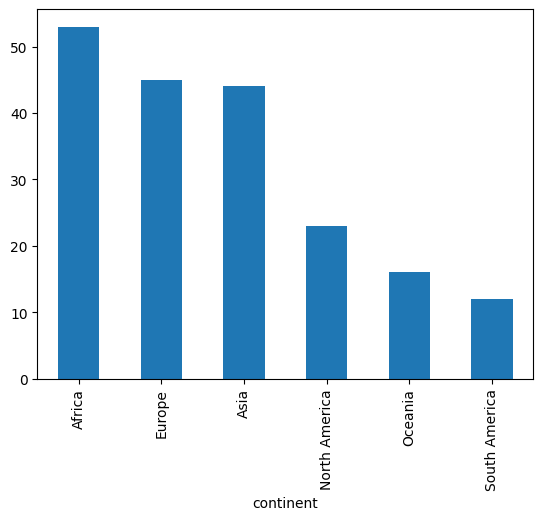

In [407]:
drinks.continent.value_counts().plot(kind='bar'); #;

#### Warunki i filtry

In [408]:
drinks_europe = drinks[drinks.continent == 'Europe']
drinks_europe.head()

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
1,Albania,89,132,54,4.9,Europe
3,Andorra,245,138,312,12.4,Europe
7,Armenia,21,179,11,3.8,Europe
9,Austria,279,75,191,9.7,Europe
10,Azerbaijan,21,46,5,1.3,Europe


In [409]:
drinks_europe[drinks_europe.beer_servings >= 300]

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
45,Czech Republic,361,170,134,11.8,Europe
65,Germany,346,117,175,11.3,Europe
81,Ireland,313,118,165,11.4,Europe
98,Lithuania,343,244,56,12.9,Europe
135,Poland,343,215,56,10.9,Europe


In [412]:
drinks_europe.sort_values(by='total_litres_of_pure_alcohol', ascending=False)

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
15,Belarus,142,373,42,14.4,Europe
98,Lithuania,343,244,56,12.9,Europe
3,Andorra,245,138,312,12.4,Europe
45,Czech Republic,361,170,134,11.8,Europe
61,France,127,151,370,11.8,Europe
155,Slovakia,196,293,116,11.4,Europe
99,Luxembourg,236,133,271,11.4,Europe
81,Ireland,313,118,165,11.4,Europe
65,Germany,346,117,175,11.3,Europe
75,Hungary,234,215,185,11.3,Europe


In [413]:
drinks.groupby(by='continent')['total_litres_of_pure_alcohol'].mean()

continent
Africa           3.007547
Asia             2.170455
Europe           8.617778
North America    5.995652
Oceania          3.381250
South America    6.308333
Name: total_litres_of_pure_alcohol, dtype: float64

### Porównanie do SQL

Wszystkto to co możemy zrobić za pomocą poleceń DML w języku SQL, możemy zrobić też w Pandas

In [414]:
movies

,star_rating,title,content_rating,genre,duration,actors_list
0,9.3,The Shawshank Redemption,R,Crime,142,"[u'Tim Robbins', u'Morgan Freeman', u'Bob Gunt..."
1,9.2,The Godfather,R,Crime,175,"[u'Marlon Brando', u'Al Pacino', u'James Caan']"
2,9.1,The Godfather: Part II,R,Crime,200,"[u'Al Pacino', u'Robert De Niro', u'Robert Duv..."
3,9.0,The Dark Knight,PG-13,Action,152,"[u'Christian Bale', u'Heath Ledger', u'Aaron E..."
4,8.9,Pulp Fiction,R,Crime,154,"[u'John Travolta', u'Uma Thurman', u'Samuel L...."
...,...,...,...,...,...,...
974,7.4,Tootsie,PG,Comedy,116,"[u'Dustin Hoffman', u'Jessica Lange', u'Teri G..."
975,7.4,Back to the Future Part III,PG,Adventure,118,"[u'Michael J. Fox', u'Christopher Lloyd', u'Ma..."
976,7.4,Master and Commander: The Far Side of the World,PG-13,Action,138,"[u'Russell Crowe', u'Paul Bettany', u'Billy Bo..."
977,7.4,Poltergeist,PG,Horror,114,"[u'JoBeth Williams', u""Heather O'Rourke"", u'Cr..."


In [415]:
# SELECT star_rating, title FROM movies
movies[['star_rating', 'title']]

,star_rating,title
0,9.3,The Shawshank Redemption
1,9.2,The Godfather
2,9.1,The Godfather: Part II
3,9.0,The Dark Knight
4,8.9,Pulp Fiction
...,...,...
974,7.4,Tootsie
975,7.4,Back to the Future Part III
976,7.4,Master and Commander: The Far Side of the World
977,7.4,Poltergeist


In [417]:
# SELECT * FROM movies WHERE genre='Crime';
movies[movies.genre == 'Crime']

,star_rating,title,content_rating,genre,duration,actors_list
0,9.3,The Shawshank Redemption,R,Crime,142,"[u'Tim Robbins', u'Morgan Freeman', u'Bob Gunt..."
1,9.2,The Godfather,R,Crime,175,"[u'Marlon Brando', u'Al Pacino', u'James Caan']"
2,9.1,The Godfather: Part II,R,Crime,200,"[u'Al Pacino', u'Robert De Niro', u'Robert Duv..."
4,8.9,Pulp Fiction,R,Crime,154,"[u'John Travolta', u'Uma Thurman', u'Samuel L...."
21,8.7,City of God,R,Crime,130,"[u'Alexandre Rodrigues', u'Matheus Nachtergael..."
...,...,...,...,...,...,...
927,7.5,Brick,R,Crime,110,"[u'Joseph Gordon-Levitt', u'Lukas Haas', u'Emi..."
931,7.4,Mean Streets,R,Crime,112,"[u'Robert De Niro', u'Harvey Keitel', u'David ..."
950,7.4,Bound,R,Crime,108,"[u'Jennifer Tilly', u'Gina Gershon', u'Joe Pan..."
969,7.4,Law Abiding Citizen,R,Crime,109,"[u'Gerard Butler', u'Jamie Foxx', u'Leslie Bibb']"


In [419]:
# SELECT * FROM movies WHERE genre='Crime' and star_rating > 8;
movies[(movies.genre == 'Crime') & (movies.star_rating > 8)]

,star_rating,title,content_rating,genre,duration,actors_list
0,9.3,The Shawshank Redemption,R,Crime,142,"[u'Tim Robbins', u'Morgan Freeman', u'Bob Gunt..."
1,9.2,The Godfather,R,Crime,175,"[u'Marlon Brando', u'Al Pacino', u'James Caan']"
2,9.1,The Godfather: Part II,R,Crime,200,"[u'Al Pacino', u'Robert De Niro', u'Robert Duv..."
4,8.9,Pulp Fiction,R,Crime,154,"[u'John Travolta', u'Uma Thurman', u'Samuel L...."
21,8.7,City of God,R,Crime,130,"[u'Alexandre Rodrigues', u'Matheus Nachtergael..."
23,8.7,The Usual Suspects,R,Crime,106,"[u'Kevin Spacey', u'Gabriel Byrne', u'Chazz Pa..."
28,8.6,Leon: The Professional,R,Crime,110,"[u'Jean Reno', u'Gary Oldman', u'Natalie Portm..."
34,8.6,American History X,R,Crime,119,"[u'Edward Norton', u'Edward Furlong', u""Beverl..."
40,8.5,The Green Mile,R,Crime,189,"[u'Tom Hanks', u'Michael Clarke Duncan', u'Dav..."
49,8.5,The Departed,R,Crime,151,"[u'Leonardo DiCaprio', u'Matt Damon', u'Jack N..."


In [420]:
# SELECT genre, count(*), avg(star_rating) FROM movies GROUP BY genre;

#movies.groupby('genre').aggregate({'star_rating': np.mean, 'genre': np.size})
movies.groupby('genre').star_rating.aggregate(['count', 'mean'])

,count,mean
genre,,
Action,136,7.884559
Adventure,75,7.933333
Animation,62,7.914516
Biography,77,7.862338
Comedy,156,7.822436
Crime,124,7.916935
Drama,278,7.902518
Family,2,7.850000
Fantasy,1,7.700000


In [421]:
# SELECT * FROM movies ORDER BY Quantity DESC LIMIT 5;
movies.nlargest(n=5, columns='duration')

,star_rating,title,content_rating,genre,duration,actors_list
476,7.8,Hamlet,PG-13,Drama,242,"[u'Kenneth Branagh', u'Julie Christie', u'Dere..."
157,8.2,Gone with the Wind,G,Drama,238,"[u'Clark Gable', u'Vivien Leigh', u'Thomas Mit..."
78,8.4,Once Upon a Time in America,R,Crime,229,"[u'Robert De Niro', u'James Woods', u'Elizabet..."
142,8.3,Lagaan: Once Upon a Time in India,PG,Adventure,224,"[u'Aamir Khan', u'Gracy Singh', u'Rachel Shell..."
445,7.9,The Ten Commandments,APPROVED,Adventure,220,"[u'Charlton Heston', u'Yul Brynner', u'Anne Ba..."


In [423]:
s

0    1
1    2
2    3
3    4
4    5
dtype: int64

In [431]:
import pandas as pd

s = pd.DataFrame([1, 2, 3, 4, 5])
s['cum_sum'] = s.rolling(window=2).sum()
s

,0,cum_sum
0,1,NaN
1,2,3.0
2,3,5.0
3,4,7.0
4,5,9.0
